In [22]:
# main code copied from towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767
import scipy as sci
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate
import matplotlib.animation as animation
%matplotlib notebook

In [23]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2s

#Reference quantities

m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [24]:
#Define masses

m1=1 #First Star in Sun masses
m2=1 #Second Star in Sun masses
m3=1 #Third Star in Sun masses

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
r3=[0,1,0] #m

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0] #m/s

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")


#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")#Find velocity of COM
v3=sci.array(v3,dtype="float64")


In [25]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3    
    r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v12_derivs,dv3bydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs



init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,950) #20 orbital periods and 500 points

#Run the ODE solver
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

<IPython.core.display.Javascript object>


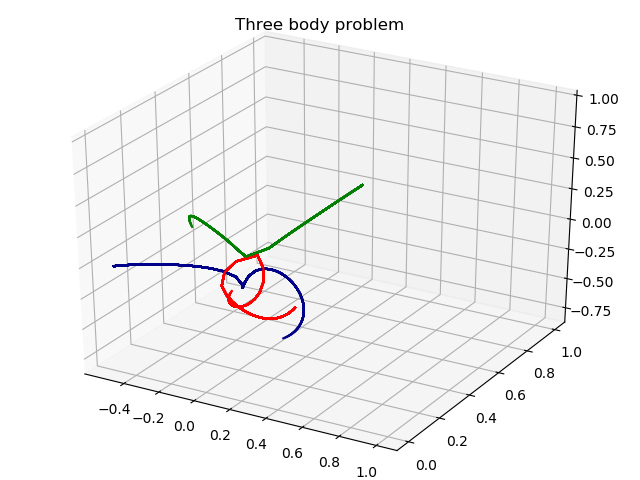

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Three body problem')

r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

def bodies(frames):
    return ax.plot(r1_sol[:frames,0],r1_sol[:frames,1],r1_sol[:frames,2], color="darkblue"), ax.plot(r2_sol[:frames,0],r2_sol[:frames,1],r2_sol[:frames,2], color="red"),ax.plot(r3_sol[:frames,0],r3_sol[:frames,1],r3_sol[:frames,2], color="green")

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, bodies,
                                   interval=1, frames = 2000,repeat = True, blit = True)


plt.show()